## Data Loading and Preprocessing

In [257]:
# importing required dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [258]:
# loading dataset
df = pd.read_json("./problems_data.jsonl", lines=True)
df.head()

,title,description,input_description,output_description,sample_io,problem_class,problem_score,url
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,"[{'input': '7 10', 'output': '1 2 2 3 1 3 3 4 ...",hard,9.7,https://open.kattis.com/problems/uuu
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,"[{'input': '0 2 3 2 50 60 50 30 50 40', 'outpu...",hard,9.7,https://open.kattis.com/problems/husbygge
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,"[{'input': '', 'output': ''}]",hard,9.6,https://open.kattis.com/problems/marioorluigi
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,"[{'input': '4 3 3 C 2 C 1 C', 'output': 'GHOST...",hard,9.6,https://open.kattis.com/problems/thewireghost
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,"[{'input': '2 0 10 0 10 10', 'output': '14.14'...",hard,9.6,https://open.kattis.com/problems/barktree


In [259]:
df.shape

(4112, 8)

2nd row has no input_description and no output_description -> maybe empty strings

In [260]:
# droping url and sample_io columns
df.drop(columns=["url", "sample_io"], inplace=True)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4112 entries, 0 to 4111
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               4112 non-null   object 
 1   description         4112 non-null   object 
 2   input_description   4112 non-null   object 
 3   output_description  4112 non-null   object 
 4   problem_class       4112 non-null   object 
 5   problem_score       4112 non-null   float64
dtypes: float64(1), object(5)
memory usage: 192.9+ KB


In [262]:
df.isnull().sum()

title                 0
description           0
input_description     0
output_description    0
problem_class         0
problem_score         0
dtype: int64

No None, NaN values in the dataset

In [263]:
# checking for strings having "NA" or "N/A"
df.isin(["N/A", "NA", "n/a", "na", "NAN", "None"]).sum().sum()

0

In [264]:
# checking for empty strings in the dataset
df.isin([""]).sum().sum()

332

In [265]:
# replacing empty strings with "missng info"
text_cols = ["description", "input_description", "output_description"]

for col in text_cols:
    df[col] = df[col].replace("", "missing info")

In [266]:
df.head()

,title,description,input_description,output_description,problem_class,problem_score
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,hard,9.7
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,hard,9.7
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,missing info,missing info,hard,9.6
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,hard,9.6
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,hard,9.6


In [267]:
# checking for empty strings in the dataset
df.isin([""]).sum().sum()

0

## Text cleaning

In [268]:
# downloading and importing stopwords
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amareswarnagam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [269]:
print(stop_words)

{"she'd", 'i', 'over', 'for', 've', 'there', 'ma', 'myself', 'yourselves', 'mightn', "i'm", 'herself', "you've", 'during', 'when', 'why', 'off', 'hasn', "i'll", "didn't", 'y', "she'll", 'nor', 'so', 'you', 'a', 'are', "aren't", 'my', 'now', 'of', 'her', "they'll", 'who', "they're", "we'll", 'him', 'against', 'on', 'd', "it'll", 'then', "you'll", 'very', 'same', 'hers', "we've", 'again', 'up', 'more', 'hadn', "should've", 'further', 'ain', 'did', 'out', 'am', "it's", 'didn', 'that', 'while', 'your', "haven't", 'by', 'is', 'which', 'themselves', "mightn't", 'not', 'himself', 're', 'the', "isn't", 'do', 'won', 'haven', 'most', 'at', 'no', 'yourself', 'he', "i'd", 'me', 'should', 'above', 'were', 'all', 'after', "you'd", 'any', 'yours', "he's", 'both', 'some', 'between', "we're", "wouldn't", 'under', 'as', 'from', 'isn', "i've", 'too', 'ourselves', 'shan', "he'd", 'their', 'have', "mustn't", 'ours', "that'll", 'does', "wasn't", 'but', 'our', 'whom', 'be', 'below', 'just', 'mustn', 'here', 

In [270]:
# function for cleaning text
def clean_text(text):
    text = text.lower()
    # text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"[^a-z0-9\s+*/=<>-]", " ", text)
    text = re.sub(r"\s+", " ", text)
    tokens = [word for word in text.split() if word not in stop_words]
    return " ".join(tokens)

In [271]:
# cleaning all text columns
cols = ["title", "description", "input_description", "output_description"]
for col in cols:
    df[col] = df[col].apply(clean_text)

In [272]:
# combining all text columns
df["text"] = (
    df["title"]
    + " "
    + df["description"]
    + " "
    + df["input_description"]
    + " "
    + df["output_description"]
)

In [273]:
df["text"].iloc[0]

'uuu unununium uuu name chemical element atom number 111 changed r ntgenium rg 2004 heavy elements unstable synthesized laboratories hired one labs optimize algorithms used simulations example simulating complicated chemical reactions important keep track many particles done counting connected components graph currently lab python code see attachments takes undirected graph outputs number connected components see code based everyone favourite data structure union-find1 looking code notice actually bug code still gives correct answers bug could cause run inefficiently task construct graph given number vertices edges code runs slowly count many times third line one inside loop visited program get score according number input consists one line two integers n number vertices edges graph apart sample one test case n = 100 = 500 output consists lines th contains two integers u v 1 leq u v leq n indicates vertices u v connected edge graph'

In [274]:
df.head()

,title,description,input_description,output_description,problem_class,problem_score,text
0,uuu,unununium uuu name chemical element atom numbe...,input consists one line two integers n number ...,output consists lines th contains two integers...,hard,9.7,uuu unununium uuu name chemical element atom n...
1,house building,number eccentrics central new york decided eno...,input consists 10 test cases described,print k lines positions houses line contain tw...,hard,9.7,house building number eccentrics central new y...
2,mario luigi,mario luigi playing game pick distinct numbers...,missing info,missing info,hard,9.6,mario luigi mario luigi playing game pick dist...
3,wire ghost,ofka bending copper wire starts straight wire ...,first line contains two integers l n l length ...,output consists single line consisting string ...,hard,9.6,wire ghost ofka bending copper wire starts str...
4,barking wrong tree,dog spot let loose park well relatively loose ...,first line input consists two integers n 1 le ...,write single line containing length needed lea...,hard,9.6,barking wrong tree dog spot let loose park wel...


<Axes: xlabel='problem_class', ylabel='count'>

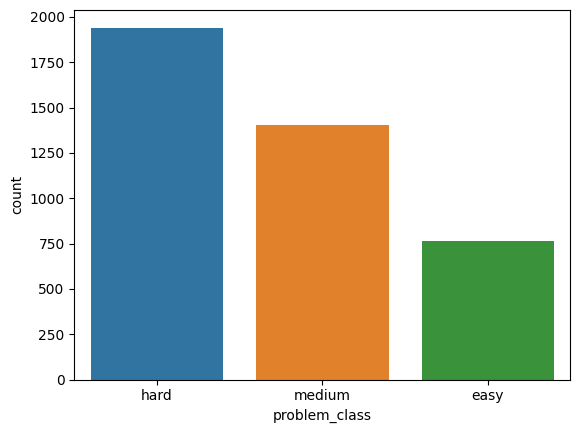

In [275]:
# barplot to know the number of labels in problem_class column
sns.countplot(data=df, x="problem_class", hue="problem_class")

**Data is imbalanced**

In [276]:
# df["num_characters"].groupby(df["problem_class"]).describe()

**hard problem have more characters on average**

In [277]:
from wordcloud import WordCloud


def plot_wordcloud(text, title):
    wc = WordCloud(
        width=500, height=500, min_font_size=12, background_color="white"
    ).generate(text)
    plt.figure(figsize=(15, 6))
    plt.imshow(wc.to_image(), interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

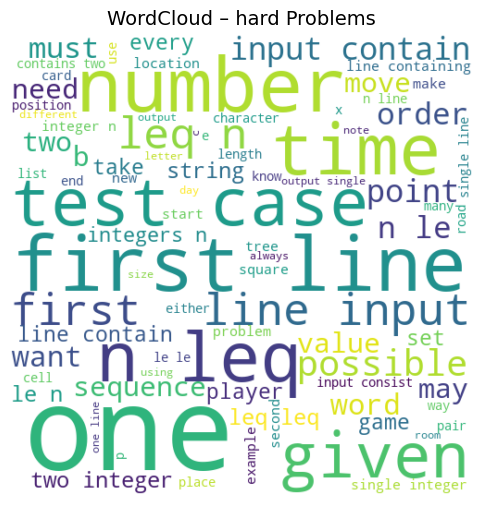

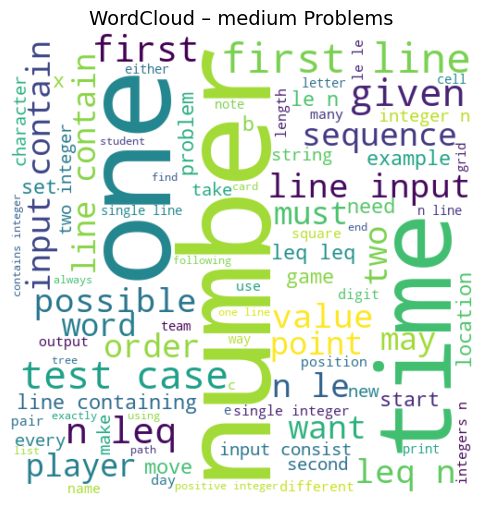

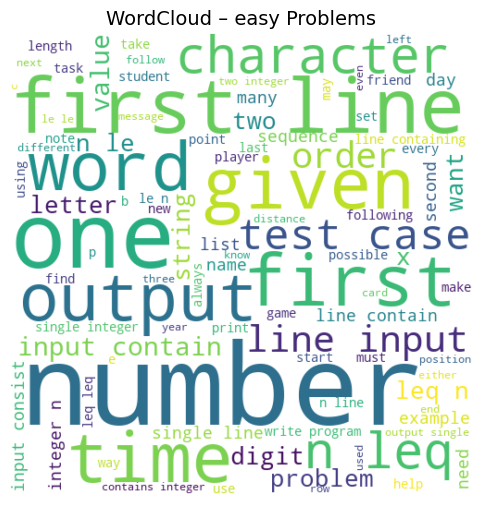

In [278]:
for difficulty in df["problem_class"].unique():
    class_text = " ".join(df[df["problem_class"] == difficulty]["text"])
    plot_wordcloud(class_text, f"WordCloud – {difficulty} Problems")

In [279]:
# keywords = [
#     "graph", "tree", "dp", "dynamic programming",
#     "recursion", "greedy", "binary search",
#     "sorting", "heap", "stack", "queue"
# ]

# def keyword_features(text):
#     return [text.count(k) for k in keywords]

In [280]:
keywords = [
    "graph", "tree", "dp", "dynamic programming",
    "recursion", "greedy", "binary search",
    "sorting", "heap", "stack", "queue"
]

def keyword_features(text):
    return sum(text.count(k) for k in keywords)

In [281]:
def structural_features(text):
    return [
        len(text.split()),  # text length
        len(re.findall(r"[+\-*/=<>]", text)),  # math symbols
        text.count("if"),  # conditional hints
        text.count("for") + text.count("while"),  # loop hints
    ]

In [282]:
# engineered_features = []

# for text in df["text"]:
#     features = []
#     features.extend(keyword_features(text))
#     features.extend(structural_features(text))
#     engineered_features.append(features)

# engineered_features = np.array(engineered_features)

In [283]:
engineered_features = []

for text in df["text"]:
    features = []
    features.append(keyword_features(text))      # keyword column
    features.extend(structural_features(text))   # structural feature columns
    engineered_features.append(features)

engineered_features = np.array(engineered_features)
engineered_features_df = pd.DataFrame(
    engineered_features,
    columns=[
        "keyword_count",
        "text_length",
        "math_symbol_count",
        "if_count",
        "loop_count",
    ]
)


In [284]:
engineered_features_df.shape

(4112, 5)

In [285]:
# feature_names = keywords + ["text_length", "math_symbols", "conditional_hints", "loop_hints"]
# engineered_features_df = pd.DataFrame(engineered_features, columns=feature_names)
engineered_features_df.sample(7)

,keyword_count,text_length,math_symbol_count,if_count,loop_count
2771,0,223,7,1,0
2452,0,160,8,0,0
3827,0,97,1,1,3
1122,0,120,0,1,3
1800,0,154,3,1,0
3337,0,81,1,0,2
2066,0,120,5,0,1


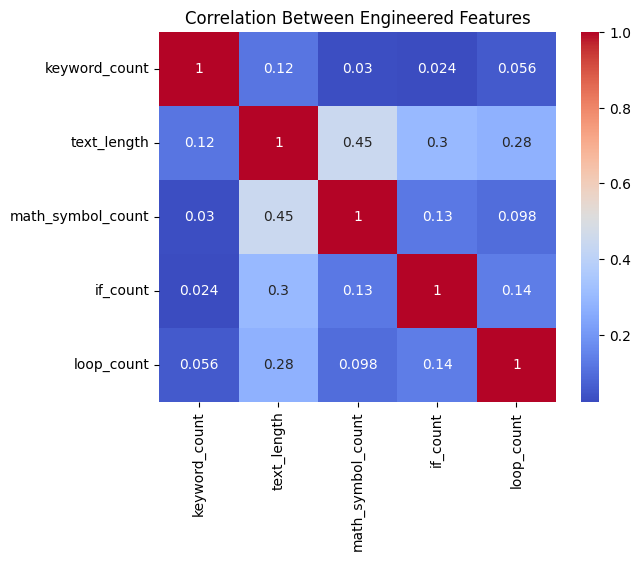

In [286]:
# correlation between engineered features
sns.heatmap(
    engineered_features_df.corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Engineered Features")
plt.show()

In [287]:
plot_df = engineered_features_df.copy()
plot_df["problem_class"] = df["problem_class"]

In [288]:
plot_df["text_length"].groupby(df["problem_class"]).describe()

,count,mean,std,min,25%,50%,75%,max
problem_class,,,,,,,,
easy,766.0,121.981723,56.877644,7.0,82.25,114.5,152.0,414.0
hard,1941.0,164.486347,70.413656,25.0,116.00,156.0,199.0,606.0
medium,1405.0,151.750890,68.638711,18.0,106.00,140.0,184.0,662.0


**Mean and Standarad deviation of text length is higher for more difficult class**

In [289]:
# sns.boxplot(
#     data=plot_df,
#     x="problem_class",
#     y="keyword_count",
#     hue="problem_class"
# )

# plt.title("Total Algorithmic Keyword Count vs Difficulty")
# plt.show()

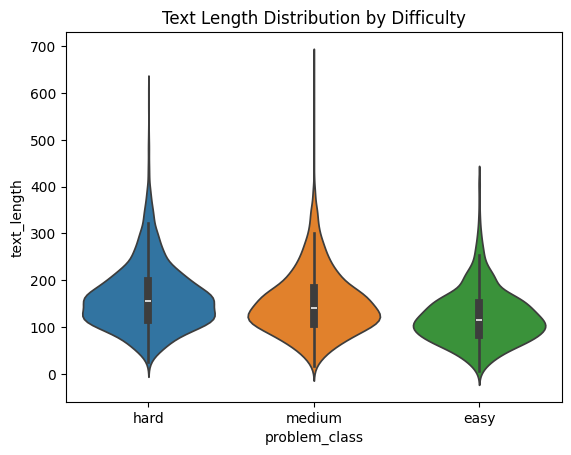

In [290]:
sns.violinplot(
    data=plot_df,
    x="problem_class",
    y="text_length",
    hue="problem_class"
)
plt.title("Text Length Distribution by Difficulty")
plt.show()

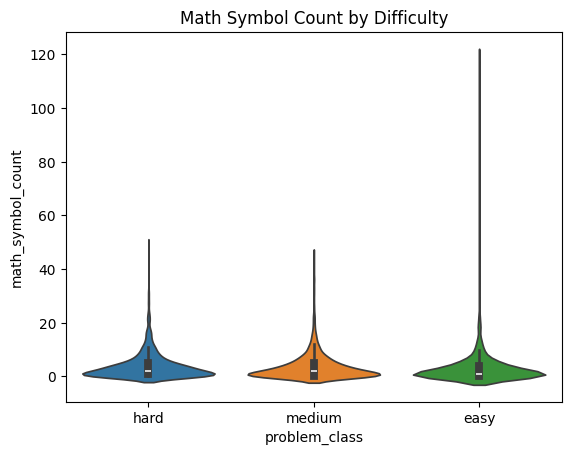

In [291]:
sns.violinplot(
    data=plot_df,
    x="problem_class",
    y="math_symbol_count",
    hue="problem_class"
)
plt.title("Math Symbol Count by Difficulty")
plt.show()

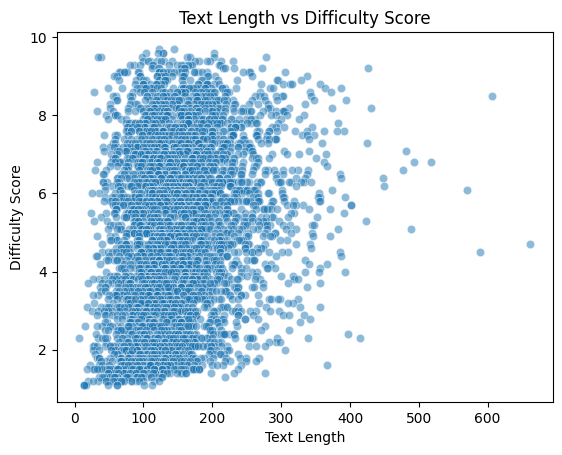

In [292]:
sns.scatterplot(
    x=engineered_features_df["text_length"],
    y=df["problem_score"],
    alpha=0.5,
)
plt.title("Text Length vs Difficulty Score")
plt.xlabel("Text Length")
plt.ylabel("Difficulty Score")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline

In [38]:
X = df["cleaned_task_desc"]
y = df["problem_class"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [40]:
print(X_train.shape, X_test.shape)

(3289,) (823,)


Vectorizer

In [ ]:
vec = TfidfVectorizer(ngram_range=(1, 2), analyzer="char", max_features=1000)

Logistic Regression

In [42]:
lr = LogisticRegression(class_weight="balanced", max_iter=5000, penalty="l2", C=0.001)
lr_pipe = Pipeline([("vec", vec), ("clf", lr)])
lr_pipe.fit(X_train, y_train)

/Users/amareswarnagam/Desktop/autojudge-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('vec', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [43]:
lr_pipe.classes_

array(['easy', 'hard', 'medium'], dtype=object)

In [44]:
y_train_pred = lr_pipe.predict(X_train)
accuracy_on_train_data = accuracy_score(y_train, y_train_pred) * 100
print(accuracy_on_train_data)

41.95804195804196


In [45]:
y_test_pred = lr_pipe.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, y_test_pred) * 100
print(accuracy_on_test_data)
f1_on_test_data = f1_score(y_test, y_test_pred, average="weighted")
print(f1_on_test_data)

38.15309842041312
0.38341532705749026


SVC

In [46]:
svc = LinearSVC(class_weight="balanced", C=0.01)

In [47]:
svc_pipe = Pipeline([("vec", vec), ("clf", svc)])
svc_pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('vec', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [48]:
svc_pipe.classes_

array(['easy', 'hard', 'medium'], dtype=object)

In [49]:
y_train_pred = svc_pipe.predict(X_train)
accuracy_on_train_data = accuracy_score(y_train, y_train_pred) * 100
print(accuracy_on_train_data)

48.85983581635755


In [50]:
y_test_pred = svc_pipe.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, y_test_pred) * 100
print(accuracy_on_test_data)
f1_on_test_data = f1_score(y_test, y_test_pred, average="weighted")
print(f1_on_test_data)

48.48116646415553
0.3441275351873256


Naive byes

In [ ]:
vec = TfidfVectorizer(ngram_range=(1, 2), analyzer="char", max_features=1000)
# vec = CountVectorizer(ngram_range=(2, 3), analyzer="word", max_features=1000)

In [52]:
cnb = ComplementNB(alpha=0.1, norm=True, fit_prior=True)
cnb_pipe = Pipeline([("vec", vec), ("clf", cnb)])
cnb_pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('vec', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [53]:
y_train_pred = cnb_pipe.predict(X_train)
accuracy_on_train_data = accuracy_score(y_train, y_train_pred) * 100
print(accuracy_on_train_data)
y_test_pred = cnb_pipe.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, y_test_pred) * 100
print(accuracy_on_test_data)
f1_on_test_data = f1_score(y_test, y_test_pred, average="weighted")
print(f1_on_test_data)

51.65703861356036
46.05103280680438
0.3507176324202131


In [54]:
mnb = MultinomialNB(alpha=0.1, fit_prior=True)
mnb_pipe = Pipeline([("vec", vec), ("clf", mnb)])
mnb_pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('vec', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [55]:
y_train_pred = mnb_pipe.predict(X_train)
accuracy_on_train_data = accuracy_score(y_train, y_train_pred) * 100
print(accuracy_on_train_data)
y_test_pred = mnb_pipe.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, y_test_pred) * 100
print(accuracy_on_test_data)
f1_on_test_data = f1_score(y_test, y_test_pred, average="weighted")
print(f1_on_test_data)

49.74156278504104
47.87363304981774
0.323638271915863


In [56]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [57]:
X = df["cleaned_task_desc"]
y = df["problem_score"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [59]:
def model_regressor():
    for model in [
        LinearRegression(),
        GradientBoostingRegressor(learning_rate=0.01, n_estimators=120),
        RandomForestRegressor(n_estimators=150),
        Lasso(alpha=0.05),
        Ridge(alpha=0.05),
        ElasticNet(alpha=0.05, l1_ratio=0.5),
    ]:
        print(f"Using model : {model}")
        model_pipe = Pipeline([("vec", vec), ("clf", model)])
        model_pipe.fit(X_train, y_train)
        print()

        y_train_pred = model_pipe.predict(X_train)
        rmse_on_train_data = root_mean_squared_error(y_train, y_train_pred)
        print(f"RMSE on training data is : {rmse_on_train_data:.3f}")
        print()

        y_test_pred = model_pipe.predict(X_test)
        rmse_on_test_data = root_mean_squared_error(y_test, y_test_pred)
        print(f"RMSE on testing data is : {rmse_on_test_data:.3f}")

        print("-" * 30)

In [60]:
model_regressor()

Using model : LinearRegression()

RMSE on training data is : 1.683

RMSE on testing data is : 2.757
------------------------------
Using model : GradientBoostingRegressor(learning_rate=0.01, n_estimators=120)

RMSE on training data is : 2.073

RMSE on testing data is : 2.130
------------------------------
Using model : RandomForestRegressor(n_estimators=150)

RMSE on training data is : 0.863

RMSE on testing data is : 2.056
------------------------------
Using model : Lasso(alpha=0.05)

RMSE on training data is : 2.178

RMSE on testing data is : 2.175
------------------------------
Using model : Ridge(alpha=0.05)

RMSE on training data is : 1.791

RMSE on testing data is : 2.175
------------------------------
Using model : ElasticNet(alpha=0.05)

RMSE on training data is : 2.178

RMSE on testing data is : 2.175
------------------------------
